<a href="https://colab.research.google.com/github/AtabikM1/PCVK25_3F_05/blob/main/Week3_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Mengubah tingkat kecerahan citra
----------------------------------
Masukkan nilai kecerahan: 5


/tmp/ipython-input-4177499615.py:29: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)


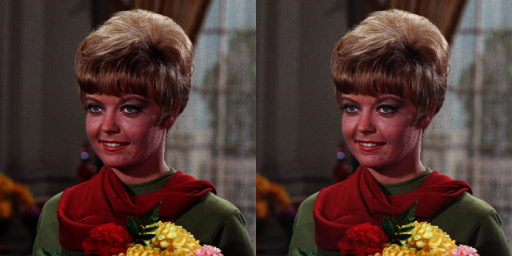

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Mengubah tingkat kecerahan citra')
print('----------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')
    brightness = 0

# Baca gambar
original = cv.imread('/content/gdrive/MyDrive/PCVK_MM/Images/female.tiff')

if original is None:
    print("Error: gambar tidak ditemukan. Cek path file!")
else:
    # Buat citra kosong
    brightness_image = np.zeros(original.shape, original.dtype)

    # akses per piksel
    for y in range(original.shape[0]):
        for x in range(original.shape[1]):
            for c in range(original.shape[2]):
                brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

    # Alternatif simpel:
    # brightness_image = cv.convertScaleAbs(original, beta=brightness)

    # gabungkan 2 gambar
    final_frame = cv.hconcat([original, brightness_image])
    cv2_imshow(final_frame)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Gamma Correction pada citra
-----------------------------
Masukkan nilai Gamma: 4


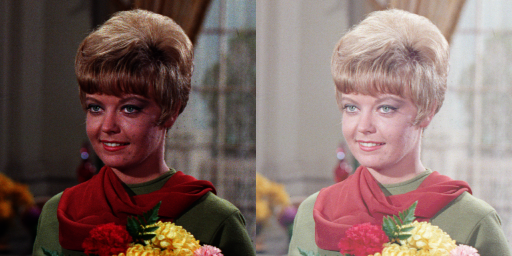

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Gamma Correction pada citra')
print('-----------------------------')

try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')
    gamma = 1.0   # default supaya tidak crash

# Baca gambar
original = cv.imread('/content/gdrive/MyDrive/PCVK_MM/Images/female.tiff')

if original is None:
    print("Error: gambar tidak ditemukan. Cek path file!")
else:
    # Normalisasi gamma (1/gamma)
    invGamma = 1.0 / gamma

    # Lookup table [0..255]
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(256)]).astype("uint8")

    # Terapkan gamma correction
    gamma_corrected = cv.LUT(original, table)

    # Gabungkan hasil sebelum & sesudah
    final_frame = cv.hconcat([original, gamma_corrected])
    cv2_imshow(final_frame)


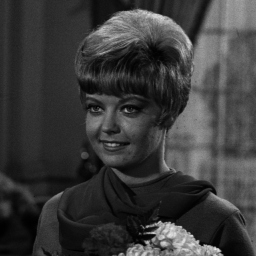

In [18]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/gdrive/MyDrive/PCVK_MM/Images/female.tiff', cv.IMREAD_GRAYSCALE)
cv2_imshow(original)


In [ ]:
# cv_img = []
# for img in glob.glob('content/gdrive/MyDrive/PCVK_MM/Images/*.tiff'):
#     n = cv2.imread(img)
#     cv_img.append(n)